# "Reach for the Sky"

**Analyst:** Taylor Morton


## Business Problem

In 1995, Pixar created one of its first and most successful animated films following a rag tag group of toys who navigate through the life of their loving owner, Andy. The film entitled "Toy Story" has grown to become one of the most beloved animated films in history. Woody, the protagonist of the film has an adventureous saying when the string on his back is pulled called "Reach for the Sky!". This often signals his drive for adventure and navigating new terrain in Andy's life, and with his toy companions.

Microsoft is one of the oldest leaders in technology and innovation, and is more than capable of capturing the film world in the future. With this leading edge, I will recommend how Microsoft can also "Reach for the Sky" and get the most out of their new film production company. 

***
## Research Questions:








**Which release dates (months of the year) would I recommend to Microsoft for their new films?**

The release date of a movie can impact how many viewers it draws in, as well as whether or not it will be nominated for any renowned awards. A recent article from Variety speaks to the importance of release dates as it relates to the domestic box office, citing distribution, marketing, and production departments who use facts and figures to determine the best return on their investment (Variety 2019). In this analysis, we are focusing on release date, popularity, and vote average as variables of interest. 


**What genres of movies make the highest domestic gross income?** 

To understand how the type of movie could indicate an easy start of success for the company, we will look at domestic gross income and genre. Focusing on genre will allow Microsoft to better determine what type of movie to produce (action, documentary, animation ect...), by looking at which genres have brought in the most domestic income? In this analysis, we are focusing on domestic gross income, and genre as variables of interest. 

**Which studios should Microsoft further study to get a better understanding of what movies to produce? (comparing studio to domestic gross income)**

Having a better understanding of which studios have been most successful in making a higher domestic gross in their movies will give Microsoft an inclination on what further production models they should be researching for this branch of their company. 
***




## Data Understanding

From the zipped data provided, I used imdb based csv files to narrow down three recommendations for upcoming movies. This data represents mainly movie genres, gross, budgets, and titles, but includes other variables including popularity, studios, release dates, production budgets and more. For these recommendations, the target variables were month of release dates, domestic gross, studios, and genres.

***

In [5]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [6]:
# Import data provided by Microsoft
os.listdir('data/zippedData')

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [7]:
genres_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
genres_df.dropna(subset=['genres'], inplace=True)
genres_df['genres'] = genres_df['genres'].apply(lambda x: x.split(','))
genres_df = genres_df.explode('genres')
genres_df.head(10)
#Credit: Claude Fried

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,Comedy
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Drama


In [8]:
#Import CSV from tmdb 
mo = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
mo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [9]:
#Import data that focuses on gross data 
gs = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data Preparation & Analysis

### Which Release Dates (months of the year) would I recommend to Microsoft for their new films? 

In [10]:
mo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [11]:
mo['release_date']

0        2010-11-19
1        2010-03-26
2        2010-05-07
3        1995-11-22
4        2010-07-16
            ...    
26512    2018-10-13
26513    2018-05-01
26514    2018-10-01
26515    2018-06-22
26516    2018-10-05
Name: release_date, Length: 26517, dtype: object

In [12]:
print(mo['release_date'].dtype)

object


In [13]:
mo.loc[:5, 'release_date']

0    2010-11-19
1    2010-03-26
2    2010-05-07
3    1995-11-22
4    2010-07-16
5    2010-02-11
Name: release_date, dtype: object

In [14]:
mo['release_date'].head()

0    2010-11-19
1    2010-03-26
2    2010-05-07
3    1995-11-22
4    2010-07-16
Name: release_date, dtype: object

In [15]:
pd.to_datetime(mo['release_date'], format='%Y/%m/%d').head(2)

0   2010-11-19
1   2010-03-26
Name: release_date, dtype: datetime64[ns]

In [16]:
mo['monthof']=pd.to_datetime(mo['release_date']).dt.month

In [17]:
mo['monthof']

0        11
1         3
2         5
3        11
4         7
         ..
26512    10
26513     5
26514    10
26515     6
26516    10
Name: monthof, Length: 26517, dtype: int64

In [18]:
mo['monthof'].mode()

0    1
dtype: int64

In [19]:
mo.groupby(['monthof']).mean()

,Unnamed: 0,id,popularity,vote_average,vote_count
monthof,,,,,
1,12421.901980,289163.437101,2.180176,5.866762,65.612388
2,13681.524783,284874.361834,3.352600,5.958240,189.337670
3,14003.534497,289719.502909,3.052933,6.042810,168.189942
4,13902.661341,296493.706937,2.784293,6.117537,120.299299
5,13458.068633,293177.639678,3.123663,6.003539,230.502413
6,13376.954755,293923.416898,3.043683,6.067959,203.485688
7,13026.402261,291002.682846,3.585265,5.883710,304.916223
8,13138.877503,295222.210247,3.580677,5.908539,187.911661
9,13049.484099,296616.382067,3.265490,5.955300,167.389134


### Which studios should Microsoft further study to get a better understanding of what movies to produce? (comparing studios to domestic gross income)

In [20]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [21]:
gs['domestic_gross']

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64

In [22]:
genres_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
genres_df.dropna(subset=['genres'], inplace=True)
genres_df['genres'] = genres_df['genres'].apply(lambda x: x.split(','))
genres_df = genres_df.explode('genres')
genres_df.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama


In [23]:
joined_df = genres_df.merge(gs, left_on= 'original_title', right_on= 'title', how='inner')
#joined_df = genres_df.join(gs, how='outer')
#print(joined_df)
joined_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,Action,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0315642,Wazir,Wazir,2016,103.0,Crime,Wazir,Relbig.,1100000.0,NaN,2016
2,tt0315642,Wazir,Wazir,2016,103.0,Drama,Wazir,Relbig.,1100000.0,NaN,2016
3,tt0337692,On the Road,On the Road,2012,124.0,Adventure,On the Road,IFC,744000.0,8000000,2012
4,tt0337692,On the Road,On the Road,2012,124.0,Drama,On the Road,IFC,744000.0,8000000,2012
...,...,...,...,...,...,...,...,...,...,...,...
6222,tt8851262,Spring Fever,Spring Fever,2019,NaN,Horror,Spring Fever,Strand,10800.0,150000,2010
6223,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,Documentary,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000,2018
6224,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,Music,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000,2018
6225,tt9805754,Double Trouble,Double Trouble,2013,99.0,Comedy,Double Trouble,CL,44800.0,NaN,2012


In [24]:
joined_df.groupby(['studio']).mean().sort_values("domestic_gross")

,start_year,runtime_minutes,domestic_gross,year
studio,,,,
DR,2014.857143,97.285714,8.000000e+02,2014.000000
Shout!,2014.000000,88.000000,1.500000e+03,2014.000000
First,2010.000000,100.000000,2.000000e+03,2010.000000
ALP,2014.000000,125.250000,2.800000e+03,2011.000000
Icar.,2014.000000,82.000000,3.200000e+03,2015.000000
...,...,...,...,...
Par.,2014.008889,112.150685,8.686275e+07,2014.022222
WB,2013.817891,112.681672,9.132684e+07,2013.875399
BV,2013.883534,111.128099,1.743092e+08,2013.971888


### What genres of movies make the highest domestic and foreign gross income?

In [25]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [26]:
gs['domestic_gross']

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64

In [27]:
genres_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
genres_df.dropna(subset=['genres'], inplace=True)
genres_df['genres'] = genres_df['genres'].apply(lambda x: x.split(','))
genres_df = genres_df.explode('genres')
genres_df.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama


In [28]:
joined_df = genres_df.merge(gs, left_on= 'original_title', right_on= 'title', how='inner')
#joined_df = genres_df.join(gs, how='outer')
#print(joined_df)
joined_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,Action,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0315642,Wazir,Wazir,2016,103.0,Crime,Wazir,Relbig.,1100000.0,NaN,2016
2,tt0315642,Wazir,Wazir,2016,103.0,Drama,Wazir,Relbig.,1100000.0,NaN,2016
3,tt0337692,On the Road,On the Road,2012,124.0,Adventure,On the Road,IFC,744000.0,8000000,2012
4,tt0337692,On the Road,On the Road,2012,124.0,Drama,On the Road,IFC,744000.0,8000000,2012
...,...,...,...,...,...,...,...,...,...,...,...
6222,tt8851262,Spring Fever,Spring Fever,2019,NaN,Horror,Spring Fever,Strand,10800.0,150000,2010
6223,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,Documentary,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000,2018
6224,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,Music,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000,2018
6225,tt9805754,Double Trouble,Double Trouble,2013,99.0,Comedy,Double Trouble,CL,44800.0,NaN,2012


In [29]:
joined_df.groupby(['genres']).mean().sort_values("domestic_gross")

,start_year,runtime_minutes,domestic_gross,year
genres,,,,
News,2013.166667,68.500000,3.640900e+06,2013.333333
War,2013.781250,113.666667,8.235853e+06,2014.375000
Documentary,2014.107143,76.906897,1.668892e+07,2013.902597
Romance,2013.443878,109.023499,1.720356e+07,2013.612245
Music,2014.188889,106.855556,1.916142e+07,2014.388889
Drama,2013.929932,108.716513,2.053186e+07,2014.066667
Biography,2014.429603,106.855596,2.268838e+07,2014.660650
History,2014.441441,106.693694,2.584890e+07,2014.603604
Crime,2013.686391,109.772455,2.631423e+07,2013.899408


### Which Release Dates (months of the year) would I recommend to Microsoft for their new films? 

In [30]:
mo.groupby(['monthof']).mean()

,Unnamed: 0,id,popularity,vote_average,vote_count
monthof,,,,,
1,12421.901980,289163.437101,2.180176,5.866762,65.612388
2,13681.524783,284874.361834,3.352600,5.958240,189.337670
3,14003.534497,289719.502909,3.052933,6.042810,168.189942
4,13902.661341,296493.706937,2.784293,6.117537,120.299299
5,13458.068633,293177.639678,3.123663,6.003539,230.502413
6,13376.954755,293923.416898,3.043683,6.067959,203.485688
7,13026.402261,291002.682846,3.585265,5.883710,304.916223
8,13138.877503,295222.210247,3.580677,5.908539,187.911661
9,13049.484099,296616.382067,3.265490,5.955300,167.389134


In [31]:
np.random.seed(400)
data = mo.groupby(['monthof']).mean()
data.head()

,Unnamed: 0,id,popularity,vote_average,vote_count
monthof,,,,,
1,12421.901980,289163.437101,2.180176,5.866762,65.612388
2,13681.524783,284874.361834,3.352600,5.958240,189.337670
3,14003.534497,289719.502909,3.052933,6.042810,168.189942
4,13902.661341,296493.706937,2.784293,6.117537,120.299299
5,13458.068633,293177.639678,3.123663,6.003539,230.502413


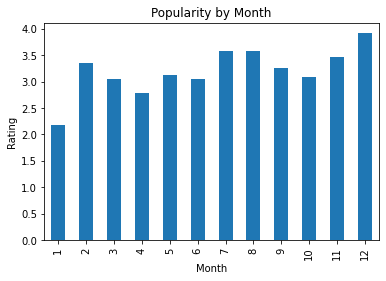

In [32]:
data['popularity'].plot.bar(alpha = 1, title = 'Popularity by Month', xlabel = 'Month', ylabel = 'Rating');

In [33]:
#In this bar plot, months 7 and 8 (July and August) have the second highest ratings of 3.5, with month 12 (December) having the highest rating of 4.0

In [34]:
joined_df.groupby(['genres']).mean().sort_values("domestic_gross")

,start_year,runtime_minutes,domestic_gross,year
genres,,,,
News,2013.166667,68.500000,3.640900e+06,2013.333333
War,2013.781250,113.666667,8.235853e+06,2014.375000
Documentary,2014.107143,76.906897,1.668892e+07,2013.902597
Romance,2013.443878,109.023499,1.720356e+07,2013.612245
Music,2014.188889,106.855556,1.916142e+07,2014.388889
Drama,2013.929932,108.716513,2.053186e+07,2014.066667
Biography,2014.429603,106.855596,2.268838e+07,2014.660650
History,2014.441441,106.693694,2.584890e+07,2014.603604
Crime,2013.686391,109.772455,2.631423e+07,2013.899408


In [35]:
np.random.seed(400)
data2 = joined_df.groupby(['genres']).mean().sort_values("domestic_gross")
data2.head()

,start_year,runtime_minutes,domestic_gross,year
genres,,,,
News,2013.166667,68.500000,3.640900e+06,2013.333333
War,2013.781250,113.666667,8.235853e+06,2014.375000
Documentary,2014.107143,76.906897,1.668892e+07,2013.902597
Romance,2013.443878,109.023499,1.720356e+07,2013.612245
Music,2014.188889,106.855556,1.916142e+07,2014.388889


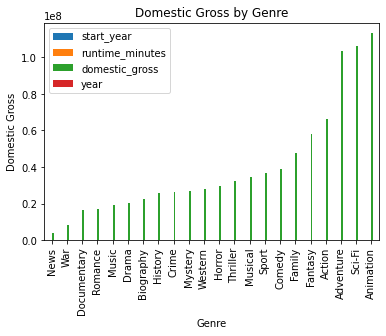

In [36]:
data2.plot.bar(alpha = 1, title = 'Domestic Gross by Genre', xlabel = 'Genre', ylabel = 'Domestic Gross');

In [37]:
np.random.seed(400)
data3 = joined_df.groupby(['studio']).mean().sort_values("domestic_gross")
studio_data = data3.tail(15) 

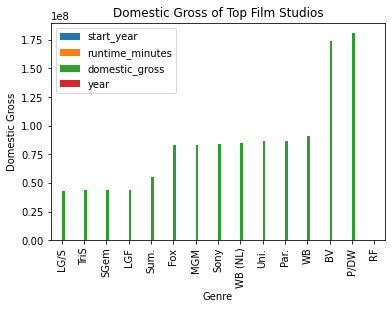

In [38]:
studio_data.plot.bar(alpha = 1, title = 'Domestic Gross of Top Film Studios', xlabel = 'Genre', ylabel = 'Domestic Gross');

## Conclusions

***
**Recommendations**
1. The Microsoft film release should take place in either **july, august, or december**.
2. **Animation** is the top genre recommendation for Microsoft's first film, however **sci-fi** and **adventure** could also be profitable. 
3. Microsoft should follow a model similar to **Pixar/Walt Disney studios** who have brought in the highest domestic gross from their films 

**Key Takeaways and Future Studies** 

The limitations of this research center around not including the foreign gross from these films, and factoring in the production budget for these films. This particularly relates to recommendation 2 & 3 considering the costs and time that the production team will need to put into creating an animated film. 

Future studies should include a larger analysis on foreign gross, domestic gross, production budget, and return on income that each film in these data set has brought in. Further research and analysis could also be done on summer block buster movies and the return on investment that they offer to this work. 
***